### Helper for loading the datasets

In [2]:
import pandas as pd
from scipy.io.arff import loadarff

def load_dataset(filename: str) -> pd.DataFrame:
    """Read the desired Dataset."""
    file_path_prefix = "/Users/helfs/Downloads/repository/"
    raw_data = loadarff(file_path_prefix + filename)
    return pd.DataFrame(raw_data[0])

### Mapping the species, filenames and changepoints from the data present in the paper

In [3]:
datasets = {
    "Incremental (bal.)": {
        "change_point": [],
        "filename": "INSECTS-incremental_balanced_norm.arff",
    },
    "Incremental (imbal.)": {
        "change_point": [],
        "filename": "INSECTS-incremental_imbalanced_norm.arff",
    },
    "Abrupt (bal.)": {
        "change_point": [14352, 19500, 33240, 38682, 39510],
        "filename": "INSECTS-incremental-abrupt_balanced_norm.arff",
    },
    "Abrupt (imbal.)": {
        "change_point": [83859, 128651, 182320, 242883, 268380],
        "filename": "INSECTS-incremental-abrupt_imbalanced_norm.arff",
    },
    "Incremental-gradual (bal.)": {
        "change_point": [14028],
        "filename": "INSECTS-gradual_balanced_norm.arff",
    },
    "Incremental-gradual (imbal.)": {
        "change_point": [58159],
        "filename": "INSECTS-gradual_imbalanced_norm.arff",
    },
    "Incremental-abrupt-reoccurring (bal.)": {
        "change_point": [26568, 53364],
        "filename": "INSECTS-abrupt_balanced_norm.arff",
    },
    "Incremental-abrupt-reoccurring (imbal.)": {
        "change_point": [150683, 301365],
        "filename": "INSECTS-abrupt_imbalanced_norm.arff",
    },
    "Incremental-reoccurring (bal.)": {
        "change_point": [26568, 53364],
        "filename": "INSECTS-incremental-reoccurring_balanced_norm.arff",
    },
    "Incremental-reoccurring (imbal.)": {
        "change_point": [150683, 301365],
        "filename": "INSECTS-incremental-reoccurring_imbalanced_norm.arff",
    },
    "Out-of-control": {
        "change_point": [],
        "filename": "INSECTS-out-of-control_norm.arff",
    },
}


species = [
    b"ae-aegypti-female",
    b"ae-aegypti-male",
    b"cx-quinq-female",
    b"tet-angustula",
    b"musca",
    b"diatraea-male",
    b"cotesia",
    b"melonogaster",
    b"ae-albopictus-male",
    b"cx-quinq-male",
    b"ae-albopictus-female",
    b"fruit-male",
    b"sca-bipunctata",
    b"euro-bee",
    b"crisopideo",
    b"anopheles-male",
    b"fruit-female",
    b"spo-frugiperda",
    b"cx-tarsalis-female",
    b"anopheles-female",
    b"diatraea-female",
    b"chironomos",
    b"cx-tarsalis-male",
]
species.sort()

### Test if is loading properly

In [4]:
# for dataset in datasets.keys():
#     print (f"Loading dataset: {dataset}")
#     df_data = load_dataset(datasets[dataset]["filename"])

### Load a specific Dataset

In [10]:
dataset = "Incremental-gradual (imbal.)"
df_data = load_dataset(datasets[dataset]["filename"])

In [22]:
file_path_prefix = "/Users/helfs/Downloads/repository/"
raw_data = loadarff(file_path_prefix + datasets[dataset]["filename"])
raw_data[1]

Dataset: Insects-gradual-imb-weka.filters.unsupervised.attribute.Normalize-S1.0-T0.0
	Att1's type is numeric
	Att2's type is numeric
	Att3's type is numeric
	Att4's type is numeric
	Att5's type is numeric
	Att6's type is numeric
	Att7's type is numeric
	Att8's type is numeric
	Att9's type is numeric
	Att10's type is numeric
	Att11's type is numeric
	Att12's type is numeric
	Att13's type is numeric
	Att14's type is numeric
	Att15's type is numeric
	Att16's type is numeric
	Att17's type is numeric
	Att18's type is numeric
	Att19's type is numeric
	Att20's type is numeric
	Att21's type is numeric
	Att22's type is numeric
	Att23's type is numeric
	Att24's type is numeric
	Att25's type is numeric
	Att26's type is numeric
	Att27's type is numeric
	Att28's type is numeric
	Att29's type is numeric
	Att30's type is numeric
	Att31's type is numeric
	Att32's type is numeric
	Att33's type is numeric
	class's type is nominal, range is ('ae-aegypti-female', 'ae-aegypti-male', 'ae-albopictus-female',

In [84]:
df_aedes = df_data[df_data["class"] == b"ae-aegypti-female"]

print("Shape: ", df_aedes.shape)

n_slices = 5
slice_size = int(df_aedes.shape[0] / n_slices)

print(slice_size)

df_aedes.loc[:, "chunk"] = "default"

for i in range(n_slices):
    df_aedes.loc[slice_size * i : slice_size * i + slice_size, "chunk"] = str(i)

Shape:  (30231, 34)
6046


/var/folders/td/j8j5672s58vg7md59c67kn1r0000gn/T/ipykernel_18411/1185458861.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aedes.loc[:,'chunk'] = "default"


/var/folders/td/j8j5672s58vg7md59c67kn1r0000gn/T/ipykernel_18411/387175154.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chunk_id'] = chunk_ids


<Figure size 1000x600 with 0 Axes>

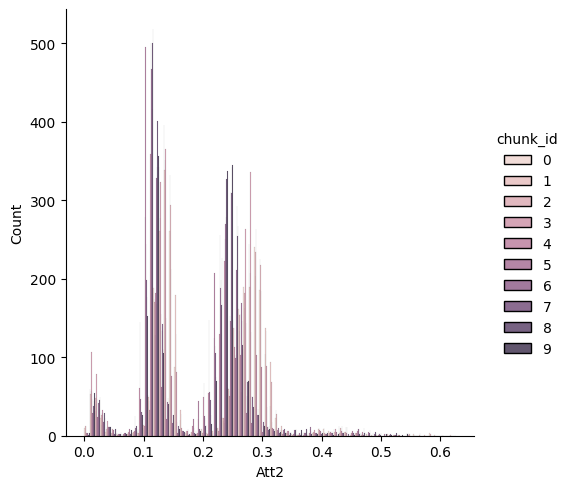

In [111]:
import numpy as np

df = df_aedes

# Define the desired number of chunks
num_chunks = 10

# Calculate the chunk size based on the number of chunks
chunk_size = len(df) // num_chunks + 1

# Generate chunk IDs
chunk_ids = np.repeat(range(num_chunks), chunk_size)[:len(df)]

# Add chunk IDs to DataFrame
df['chunk_id'] = chunk_ids

# Split the DataFrame into chunks based on chunk IDs
chunks = [group for _, group in df.groupby('chunk_id')]

# Now `chunks` is a list of DataFrames, each containing a chunk of the original DataFrame
# You can iterate through these chunks or process them as needed

# Concatenate chunks back together if needed
concatenated_df = pd.concat(chunks, ignore_index=True)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 

sns.displot(concatenated_df, x="Att2", hue="chunk_id", multiple="dodge")

plt.show()

In [ ]:
start_idx = 10000
end_idx = 50000

data = df_data.iloc[start_idx:end_idx]
rows = 2
columns = 2
chunks = rows * columns
chunksize = int(len(data["class"]) / chunks)
ranges = [(i*chunksize, i*chunksize + chunksize) for i in range(chunks)]

print (ranges)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows= rows * columns, sharex=True, figsize=(12,16))

for i in range(len(ranges)):
    r = ranges[i]
    start = start_idx + r[0]
    end = start_idx + r[1]
    data = df_data.iloc[start:end]
    sns.countplot(ax=ax[i], y=data["class"], order = species)   
    ax[i].set_title(f"Range: {start}-{end}")

fig.subplots_adjust(hspace=0.4, wspace=.3) 
plt.suptitle('Sampling from various slices',fontsize=25)
plt.show()

### Create some ranges for plotting

In [40]:
start_idx = 10000
end_idx = 50000

data = df_data.iloc[start_idx:end_idx]
rows = 2
columns = 2
chunks = rows * columns
chunksize = int(len(data["class"]) / chunks)
ranges = [(i*chunksize, i*chunksize + chunksize) for i in range(chunks)]

print (ranges)

[(0, 10000), (10000, 20000), (20000, 30000), (30000, 40000)]


### Plot the previous distributions

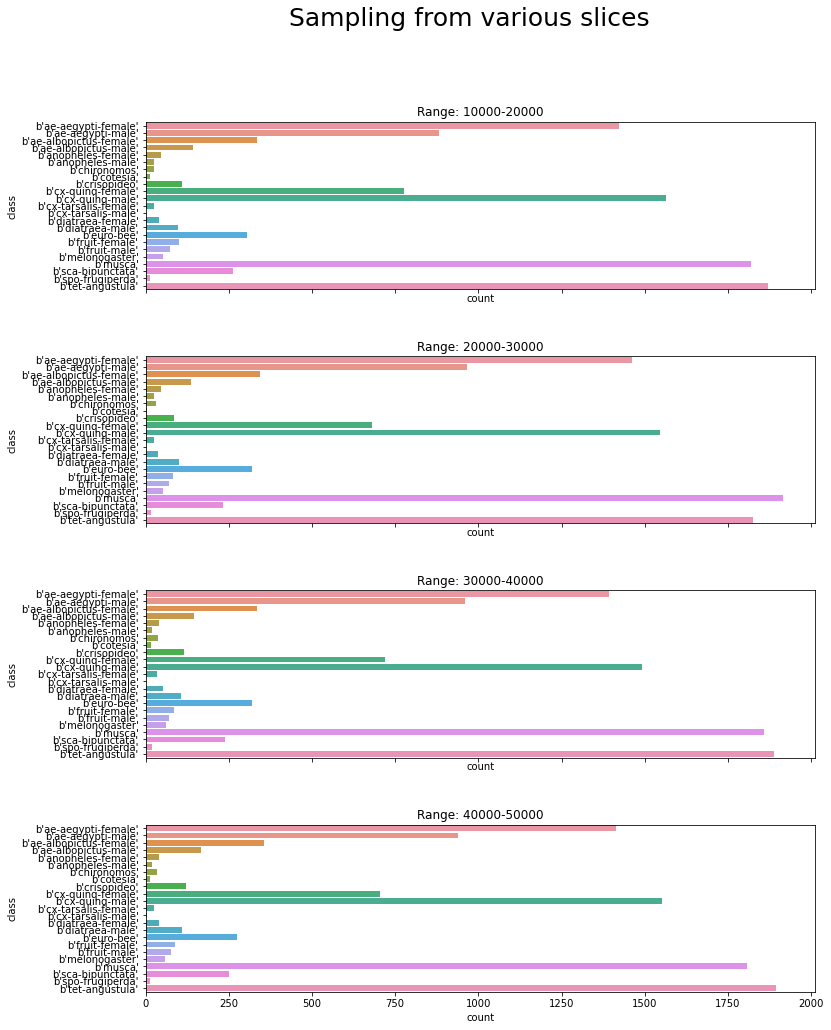

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows= rows * columns, sharex=True, figsize=(12,16))

for i in range(len(ranges)):
    r = ranges[i]
    start = start_idx + r[0]
    end = start_idx + r[1]
    data = df_data.iloc[start:end]
    sns.countplot(ax=ax[i], y=data["class"], order = species)   
    ax[i].set_title(f"Range: {start}-{end}")

fig.subplots_adjust(hspace=0.4, wspace=.3) 
plt.suptitle('Sampling from various slices',fontsize=25)
plt.show()

O trabalho consiste em investigar a variação de $P(X, Y)$, a medida que $P(Y)$ vai variando ao longo da stream e as classes ficam desbalanceadas. Não é necessariamente uma questão de variações em $P(X)$.

Types of concept drift, from page 7 of [Challenges in Benchmarking Stream Learning
Algorithms with Real-world Data](https://arxiv.org/pdf/2005.00113.pdf):

- $X → Y$: the class label is derived from the behavior of the instance. One example
is recognizing specific body movements of a person with sensors. The joint
distribution is often written as $P (X, Y ) = P (Y |X)P (X)$;

- $Y → X$ : the class label determines the values of the features. One example is a
disease diagnosis in which the disease causes symptoms. The joint distribution
is often written as $P (X, Y ) = P (X|Y )P (Y )$.


To simplify our discussion, we call $P_A$ the probability before the drift and $P_B$ the probability
after the drift has occurred so that we can compare both distributions.


*Definition 1* Covariate shift is the case where $P_A(Y |X) = P_B (Y |X)$ and $P_A(X) \neq
P_B (X)$.

*Definition 2* Prior probability shift is the case where $P_A(X|Y ) = P_B (X|Y )$ and
$P_A(Y ) \neq P_B (Y )$.